<a href="https://colab.research.google.com/github/s83512266/Tibame_AI_111-2_group2_project/blob/main/%E8%B3%87%E6%96%99%E8%99%95%E7%90%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pandas
import numpy as np
import glob
import matplotlib.pyplot as plt
from PIL import Image
import codecs
import os
import cv2
import IPython.display as dp
from google.colab.patches import cv2_imshow

(1482, 2048)


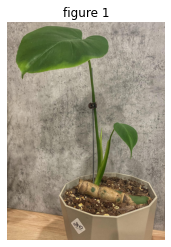

In [ ]:
# 獲得資料夾中所有圖片的路徑
img_path = glob.glob("/content/drive/MyDrive/(a)龜背芋正常 (含幼葉、成熟葉)/*.JPG")

# 設定圖片大小
# plt.figure(figsize=(14, 42))
# 設定子圖數量
# width = 10
# height = len(img) // width + 1

# 顯示資料夾中所有的圖片
# for i in range(len(img)):
#   plt.subplot(height, width, i+1)
#   title = "figure {}".format(i+1)
#   plt.title(title)
#   plt.axis("off")
#   plt.imshow(Image.open(img[i]))

# 顯示一張圖片，並旋轉圖片
img = Image.open(img_path[0])
# img_rotate = img.rotate(-90, expand=True)
title = "figure 1"
plt.title(title)
plt.axis("off")
plt.imshow(img)
print(img.size)


In [ ]:
# 建立資料夾
if not os.path.exists("/content/drive/MyDrive/Normal_img"):
	os.mkdir("/content/drive/MyDrive/Normal_img")

# 處理長方形且非正向的圖片：將所有圖片旋轉，並變成正方形，並儲存成檔案
for i in range(len(img_path)):
  img = Image.open(img_path[i]) # 使用pillow讀取圖片，轉成pillow物件
  img_rotate = img.rotate(-90, expand=True) # 利用PIL旋轉圖片，不用在貼在一個背景上；expand=False會輸出原圖大小，expand=True會輸出旋轉後的大小
  img_np = np.array(img_rotate) # 將pillow物件轉成np.array
  img_np = img_np[500:3500, :, ::-1]  # 原圖shape：(4000, 3000, 3)
  cv2.imwrite("/content/drive/MyDrive/Normal_img/{}.jpg".format(i+1), img_np, [cv2.IMWRITE_JPEG_QUALITY, 80]) # 只有openCV可以直接存np.array變成照片


In [ ]:
# 建立資料夾
if not os.path.exists("/content/drive/MyDrive/Normal_img"):
	os.mkdir("/content/drive/MyDrive/Normal_img")

# 處理長方形且正向的圖片：將所有圖片變成正方形，並儲存成檔案
for i in range(len(img_path)):
  img = Image.open(img_path[i]) # 使用pillow讀取圖片，轉成pillow物件
  img_np = np.array(img) # 將pillow物件轉成np.array
  print(img_np.shape)
  img_np = img_np[:1482, :, ::-1]  # 截圖
  cv2.imwrite("/content/drive/MyDrive/(a)龜背芋正常 (含幼葉、成熟葉)/截圖成正方形之圖片/{}.jpg".format(i+148), img_np, [cv2.IMWRITE_JPEG_QUALITY, 80]) # 只有openCV可以直接存np.array變成照片


(2048, 1482, 3)


In [ ]:
# 顯示上述處理後的最後一張圖片
plt.imshow(img_np)

In [ ]:
# 安裝處理heic圖的套件
!pip install pyheif

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 6.6 MB/s 


In [ ]:
# 匯入處理HEIF/HEIC檔的套件
import pyheif
from pathlib import Path

# 讀取HEIF/HEIC檔
# 使用Path()製作路徑物件，利用open().read()讀取路徑的圖片成binary檔案
img_path = Path("/content/drive/MyDrive/(a)龜背芋正常 (含幼葉、成熟葉)/IMG_5567.HEIC 的副本")
img_binary = img_path[i].open("rb").read()

# 將HEIC圖片、Path物件、含有HEIF內容的bytes or bytearray物件 轉成 HeifFile物件
heif_file = pyheif.read(img_binary)
# heif_file.data：the raw decoded file data, as bytes (一維)
# heif_file.size：(width, height)

# 將heif_file轉換成numpy array for OpenCV：
# 將一維的array reshape成3維的array，-1：不知道有幾個通道，自動補滿；
# np的圖片size是(height, width)，因此要reversed
# img = np.frombuffer(heif_file.data, dtype=np.uint8).reshape(*reversed(heif_file.size), -1)
# img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
# cv2_imshow(img)

# 將heif_file轉換成PIL.Image物件
img = Image.frombytes(mode='RGB', size=heif_file.size, data=heif_file.data)
# img.size=(width, height)
plt.imshow(img)

AttributeError: ignored

In [ ]:
# HEIC圖檔存成JPG檔

# 建立資料夾
if not os.path.exists("/content/drive/MyDrive/(a)龜背芋正常 (含幼葉、成熟葉)/HEIC2JPG"):
	os.mkdir("/content/drive/MyDrive/(a)龜背芋正常 (含幼葉、成熟葉)/HEIC2JPG")

# np.array存成圖檔：
cv2.imwrite("img.jpg", img, [cv2.IMWRITE_JPEG_QUALITY, 80])

# PIL.Image物件存成圖檔:
# img.save("img.jpg")

In [ ]:
import pyheif
from pathlib import Path

if not os.path.exists("/content/drive/MyDrive/(a)龜背芋正常 (含幼葉、成熟葉)/HEIC2JPG"):
	os.mkdir("/content/drive/MyDrive/(a)龜背芋正常 (含幼葉、成熟葉)/HEIC2JPG")

# Path("資料夾路徑").glob(特定格式的路徑)-> generator
img_path = Path("/content/drive/MyDrive/(a)龜背芋正常 (含幼葉、成熟葉)/").glob("*.HEIC")
for i in img_path:
  img_binary = i.open("rb").read()
  heif_file = pyheif.read(img_binary)
  img = Image.frombytes(mode='RGB', size=heif_file.size, data=heif_file.data)
  img.save("/content/drive/MyDrive/(a)龜背芋正常 (含幼葉、成熟葉)/HEIC2JPG/{}.jpg".format(str(i).split('/')[-1].split('.')[0]))